<a href="https://colab.research.google.com/github/ThanhHung2112/Machine_learning/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# figuer 
%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})

In [6]:
df = pd.read_csv('/content/data.csv')

In [16]:
df = df[["X","Y"]]

In [17]:
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


<AxesSubplot:xlabel='X', ylabel='Y'>

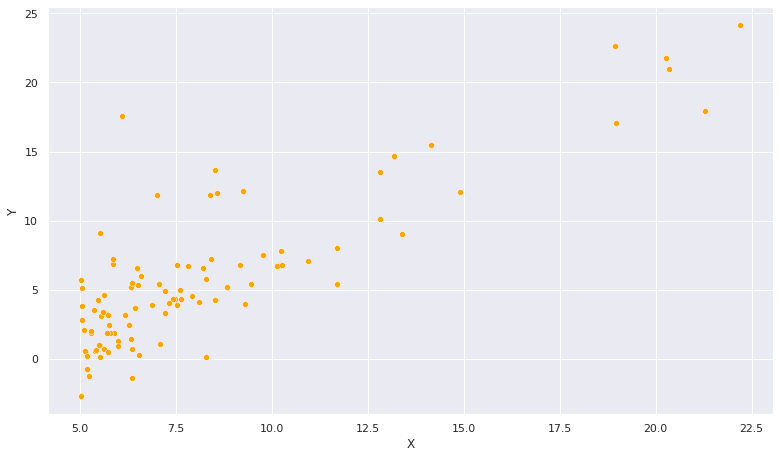

In [30]:
# tập điểm dữ liệu khởi tạo

sns.scatterplot(data=df, x="X", y="Y", color="orange")

In [33]:
## Xây dựng hàm gradient descent

def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # lưu lại giá trị w, f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # Cập nhập giá trị mới và sự khác biệt giữa các giá trị của hàm mục tiêu
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

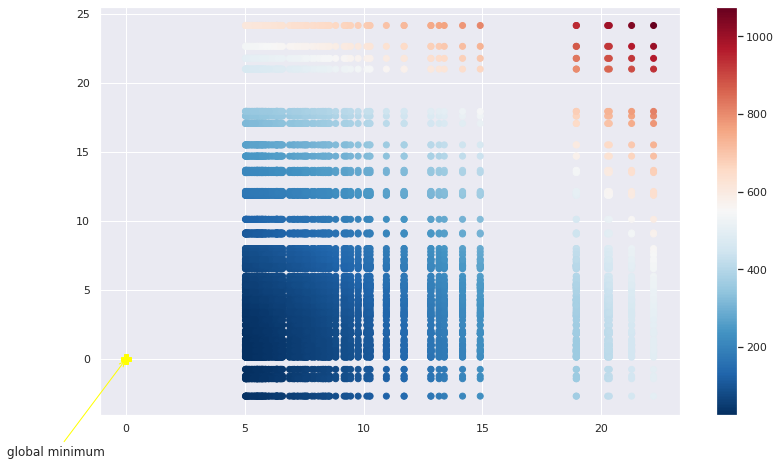

In [129]:
def visualize_fw():
    xcoord = df["X"]
    ycoord = df["Y"]

    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # Các điểm trong tập
    pts = pts.transpose()
    
    # Giá trị hàm mục tiêu tại các điểm 
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.show()
    return pts,f_vals

# Hàm trợ giúp để chú thích một điểm duy nhất
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))
    
# Biểu đồ thể hiện giá trị tương ứng tại các điểm
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Điểm tối ưu
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

In [38]:
# Hàm mục tiêu
def f(w,extra=[]):
    return np.sum(w*w)

# tính gradient
def grad(w,extra=[]):
    return 2*w

# Vẽ đồ thị hàm mục tiêu và giá trị lịch sử học
def visualize_learning(w_history):  
    
  # Vẽ đồ thị
    function_plot(pts,f_vals)
    
    # lịch sử
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Điểm được tìm thất ở cuối vòng lặp
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Các giá trị tính toán đưa ra trước
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Lặp lại qua các tham số
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

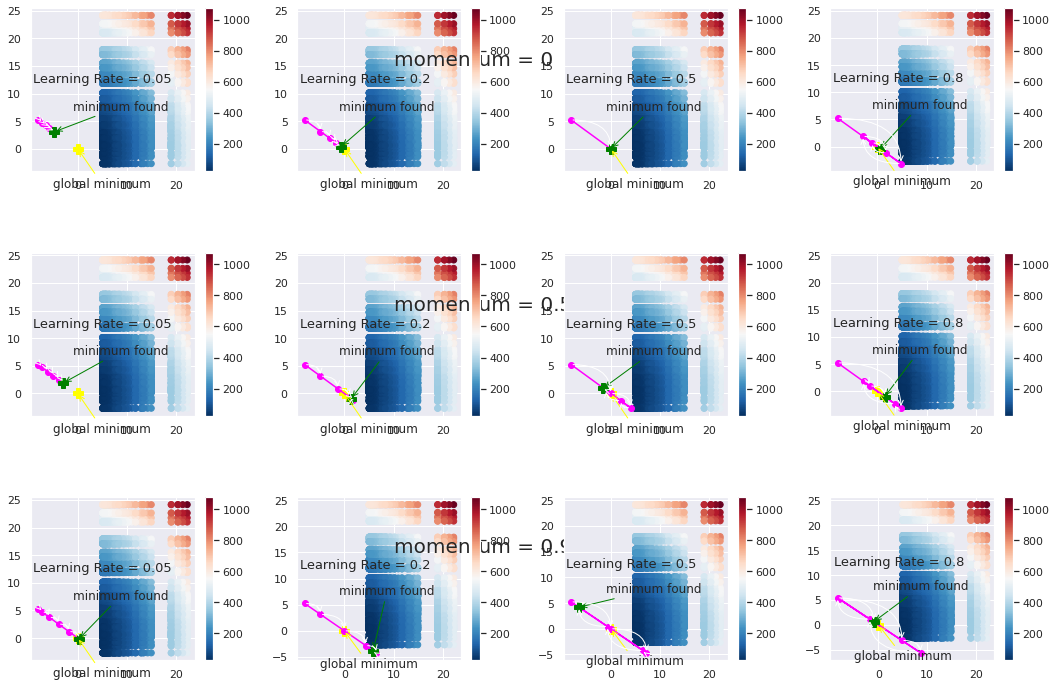

In [39]:
solve_fw()